In [25]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


In [2]:
df=pd.read_csv(r'C:\Users\kogla\OneDrive\SWE599-Flight-Ticket-Price-Estimation-Project\merged.csv').drop("Unnamed: 0", axis=1)
df.head()

,company,departure_airport,arrival_airport,departure_time,arrival_time,departure_date,price_try,departure_week_day,checked_week_day,departure_day,departure_month,remaining_day_to_flight,arrival_city,departure_airport_name,departure_hour,part_of_day,is_weekend,part_of_month,duration(min)
0,AnadoluJet,SAW,ADB,07:30:00,08:40:00,2022-11-14,506.99,Monday,Tuesday,14,11,13,Izmir,Sabiha Gökçen Airport,7,Early Morning,Weekday,Middle,70
1,AnadoluJet,SAW,ADB,09:20:00,10:30:00,2022-11-14,506.99,Monday,Tuesday,14,11,13,Izmir,Sabiha Gökçen Airport,9,Morning,Weekday,Middle,70
2,AnadoluJet,SAW,ADB,20:55:00,22:05:00,2022-11-14,506.99,Monday,Tuesday,14,11,13,Izmir,Sabiha Gökçen Airport,20,Evening,Weekday,Middle,70
3,Pegasus,SAW,ADB,23:35:00,00:45:00,2022-11-14,539.99,Monday,Tuesday,14,11,13,Izmir,Sabiha Gökçen Airport,23,Night,Weekday,Middle,70
4,Pegasus,SAW,ADB,09:10:00,10:20:00,2022-11-14,542.99,Monday,Tuesday,14,11,13,Izmir,Sabiha Gökçen Airport,9,Morning,Weekday,Middle,70


In [3]:
df=df.drop(['departure_airport', 'arrival_airport', 'departure_date','departure_time', 'arrival_time'], axis=1)

In [4]:
df['company'] = df.company.astype('category')
df['departure_airport_name'] = df.departure_airport_name.astype('category')
df['arrival_city'] = df.arrival_city.astype('category')
df['part_of_day'] = df.part_of_day.astype('category')
df['departure_week_day'] = df.departure_week_day.astype('category')
df['part_of_month'] = df.part_of_month.astype('category')
df['is_weekend'] = df.is_weekend.astype('category')
df['checked_week_day'] = df.checked_week_day.astype('category')
df["price_try"] = df["price_try"].astype("int64")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129513 entries, 0 to 129512
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   company                  129513 non-null  category
 1   price_try                129513 non-null  int64   
 2   departure_week_day       129513 non-null  category
 3   checked_week_day         129513 non-null  category
 4   departure_day            129513 non-null  int64   
 5   departure_month          129513 non-null  int64   
 6   remaining_day_to_flight  129513 non-null  int64   
 7   arrival_city             129513 non-null  category
 8   departure_airport_name   129513 non-null  category
 9   departure_hour           129513 non-null  int64   
 10  part_of_day              129513 non-null  category
 11  is_weekend               129513 non-null  category
 12  part_of_month            129513 non-null  category
 13  duration(min)            129513 non-null  in

In [5]:
df.head()

,company,price_try,departure_week_day,checked_week_day,departure_day,departure_month,remaining_day_to_flight,arrival_city,departure_airport_name,departure_hour,part_of_day,is_weekend,part_of_month,duration(min)
0,AnadoluJet,506,Monday,Tuesday,14,11,13,Izmir,Sabiha Gökçen Airport,7,Early Morning,Weekday,Middle,70
1,AnadoluJet,506,Monday,Tuesday,14,11,13,Izmir,Sabiha Gökçen Airport,9,Morning,Weekday,Middle,70
2,AnadoluJet,506,Monday,Tuesday,14,11,13,Izmir,Sabiha Gökçen Airport,20,Evening,Weekday,Middle,70
3,Pegasus,539,Monday,Tuesday,14,11,13,Izmir,Sabiha Gökçen Airport,23,Night,Weekday,Middle,70
4,Pegasus,542,Monday,Tuesday,14,11,13,Izmir,Sabiha Gökçen Airport,9,Morning,Weekday,Middle,70


## DATA PREPARATION

In [6]:
categorical_cols = df.select_dtypes(include=['category']).columns.to_list()

In [7]:
df_feature_imp=df.copy()

In [8]:
# Converting values of the categorical columns to numerical values
le=LabelEncoder()
for categorical_col in categorical_cols:
    le.fit(df_feature_imp[categorical_col])
    df_feature_imp[categorical_col] = le.transform(df_feature_imp[categorical_col])

In [52]:
corr_result = df_feature_imp.corr()["price_try"].apply(lambda val: abs(val)*100).sort_values(ascending=False)
corr_result.iloc[1:]

departure_airport_name     37.221356
company                    30.545824
duration(min)              15.998304
arrival_city               14.968095
part_of_day                10.993023
part_of_month               6.214093
departure_month             6.113216
remaining_day_to_flight     5.618920
departure_hour              4.519211
departure_week_day          3.200546
is_weekend                  2.407887
departure_day               1.744807
checked_week_day            0.588953
Name: price_try, dtype: float64

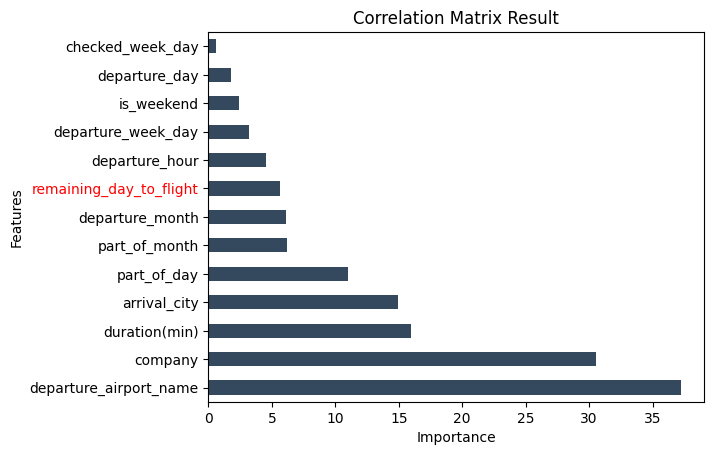

In [54]:
ax = corr_result.iloc[1:].plot(kind='barh', color="#34495E")
plt.title("Correlation Matrix Result")
plt.xlabel("Importance")
plt.ylabel("Features")
ax.get_yticklabels()[7].set_color("red")

plt.show()

In [9]:
X = df_feature_imp.drop(['price_try'], axis=1)

y = df_feature_imp['price_try']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [11]:
# converting price_try column between 1-10 range
y_train_log = np.log(y_train)

In [12]:
# scaling features
sc = StandardScaler()
X_train_norm = sc.fit_transform(X_train)

## FEATURE IMPORTANCE

### Random Forest Regressor

In [13]:
rf = RandomForestRegressor(n_estimators=100, criterion='squared_error', max_features='sqrt')

In [14]:
rf.fit(X_train_norm, y_train_log)

RandomForestRegressor(max_features='sqrt')

In [15]:
rf_feature_scores = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
rf_feature_scores = rf_feature_scores.apply(lambda value: value * 100)
rf_feature_scores

duration(min)              30.007089
arrival_city               17.568651
company                    16.318504
departure_airport_name     10.534092
departure_hour              7.007151
remaining_day_to_flight     6.068637
departure_day               3.574534
part_of_day                 3.042139
departure_week_day          2.303932
checked_week_day            1.352850
part_of_month               0.939935
departure_month             0.764637
is_weekend                  0.517850
dtype: float64

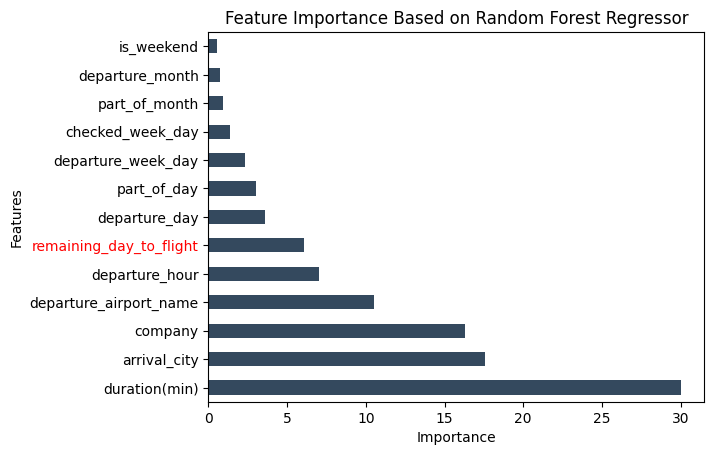

In [16]:
ax = rf_feature_scores.plot(kind='barh', color="#34495E")
plt.title("Feature Importance Based on Random Forest Regressor")
plt.xlabel("Importance")
plt.ylabel("Features")
ax.get_yticklabels()[5].set_color("red")

plt.show()

### Gradient Tree Boosting Regression

In [43]:
gbr = GradientBoostingRegressor(loss='ls', n_estimators=200, learning_rate=0.1, 
                                max_depth=8, max_features = 'sqrt',  
                                min_samples_split = 500, random_state=0)
gbr.fit(X_train_norm, y_train_log)

C:\Users\kogla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:294: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


GradientBoostingRegressor(loss='ls', max_depth=8, max_features='sqrt',
                          min_samples_split=500, n_estimators=200,
                          random_state=0)

In [44]:
gbr_feature_scores =  pd.Series(gbr.feature_importances_, index=X_train.columns).sort_values(ascending=False)
gbr_feature_scores = gbr_feature_scores.apply(lambda value: value * 100)
gbr_feature_scores

duration(min)              34.432916
company                    20.096340
arrival_city               19.039466
departure_airport_name      9.760727
departure_hour              5.390698
remaining_day_to_flight     2.750970
departure_day               2.415568
part_of_day                 2.354612
departure_week_day          1.496198
departure_month             0.869209
part_of_month               0.844472
is_weekend                  0.483348
checked_week_day            0.065477
dtype: float64

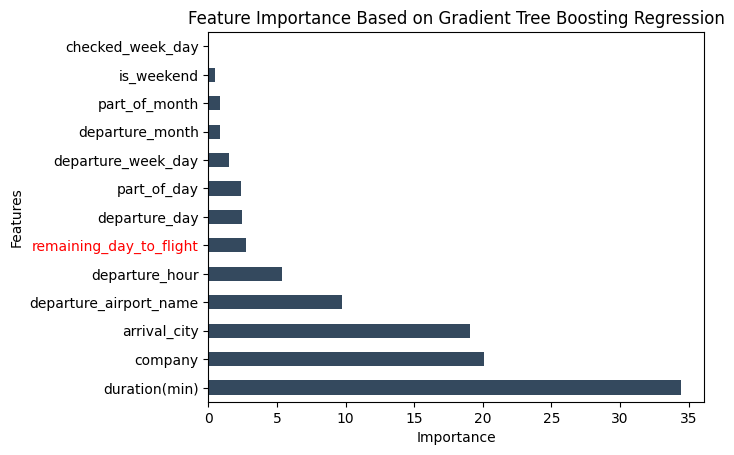

In [45]:
ax = gbr_feature_scores.plot(kind='barh', color="#34495E")
plt.title("Feature Importance Based on Gradient Tree Boosting Regression")
plt.xlabel("Importance")
plt.ylabel("Features")
ax.get_yticklabels()[5].set_color("red")

plt.show()

### Decision Tree Regressor

In [20]:
dc = DecisionTreeRegressor()
dc.fit(X_train_norm, y_train_log)

DecisionTreeRegressor()

In [21]:
dc_feature_scores =  pd.Series(dc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
dc_feature_scores = dc_feature_scores.apply(lambda value: value * 100)
dc_feature_scores

duration(min)              32.310767
company                    24.021028
arrival_city               11.947390
departure_airport_name      7.473958
departure_hour              5.944713
remaining_day_to_flight     5.414575
departure_day               4.520648
departure_week_day          2.646566
part_of_day                 1.961890
departure_month             1.456893
part_of_month               1.048714
is_weekend                  0.667159
checked_week_day            0.585701
dtype: float64

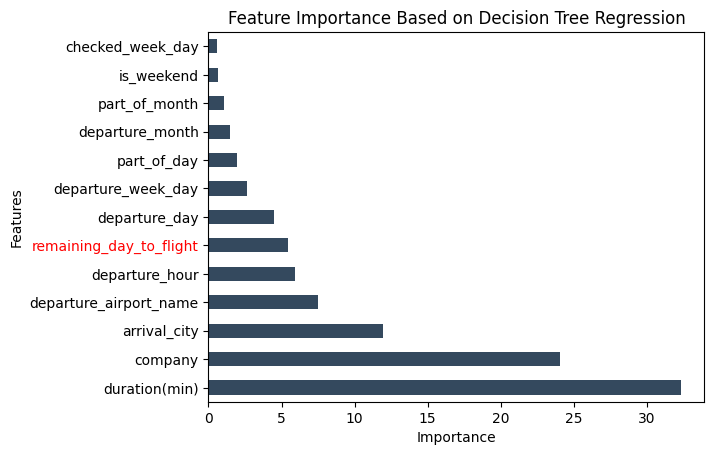

In [22]:
ax = dc_feature_scores.plot(kind='barh', color="#34495E")
plt.title("Feature Importance Based on Decision Tree Regression")
plt.xlabel("Importance")
plt.ylabel("Features")
ax.get_yticklabels()[5].set_color("red")

plt.show()

### Linear Regresion

In [28]:
lr = LinearRegression()
lr.fit(X_train_norm, y_train_log)

LinearRegression()

In [37]:
lr_feature_scores =  pd.Series(lr.coef_, index=X_train.columns)
lr_feature_scores = lr_feature_scores.apply(lambda value: abs(value * 100)).sort_values(ascending=False)
lr_feature_scores

departure_airport_name     17.364673
duration(min)              12.733316
arrival_city                9.406215
company                     4.930446
departure_month             4.859933
departure_day               4.203834
part_of_day                 1.865009
part_of_month               1.469790
departure_week_day          1.132080
remaining_day_to_flight     1.073507
is_weekend                  1.055379
checked_week_day            0.121216
departure_hour              0.110103
dtype: float64

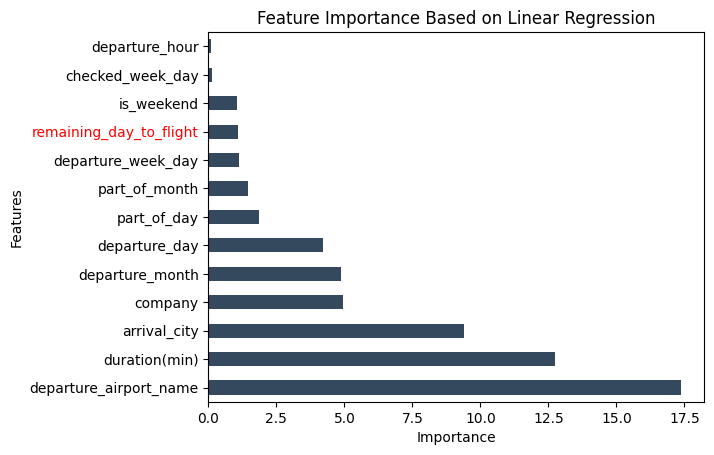

In [40]:
ax = lr_feature_scores.plot(kind='barh', color="#34495E")
plt.title("Feature Importance Based on Linear Regression")
plt.xlabel("Importance")
plt.ylabel("Features")
ax.get_yticklabels()[9].set_color("red")

plt.show()